It's a good idea to familiarize with the pretrained model you want to use.

In [1]:
from transformers import BertModel

2024-02-26 12:50:15.095342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 12:50:15.243818: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 12:50:16.147108: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/cuda/lib64:/opt/cuda/lib:/opt/cuda/lib64:/opt/cuda/lib
2024-02-26 12:50:16.147240: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dl

In [4]:
model = BertModel.from_pretrained("bert-base-cased")

The model contains three named modules:

In [27]:
# BERT is encoder only. No decoder
[name for name, module in model.named_children()]

['embeddings', 'encoder', 'pooler']

# Bert encoder

In [29]:
model.encoder

BertEncoder(
  (layer): ModuleList(
    (0-11): 12 x BertLayer(
      (attention): BertAttention(
        (self): BertSelfAttention(
          (query): Linear(in_features=768, out_features=768, bias=True)
          (key): Linear(in_features=768, out_features=768, bias=True)
          (value): Linear(in_features=768, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (output): BertSelfOutput(
          (dense): Linear(in_features=768, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (intermediate): BertIntermediate(
        (dense): Linear(in_features=768, out_features=3072, bias=True)
        (intermediate_act_fn): GELUActivation()
      )
      (output): BertOutput(
        (dense): Linear(in_features=3072, out_features=768, bias=True)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)

The encoder contains 12 `BertLayer`s (12 encoder blocks). You can see the attention head (`BertAttention`) includes `query`, `key`, `value`, which are important concepts introduced in `vault`

# The pooler

is responsible for training the useful [CLS] token. By reading BertModel's [documentation](https://huggingface.co/docs/transformers/v4.38.1/en/model_doc/bert#transformers.BertModel), we already know what it's like inside: Linear + Tanh

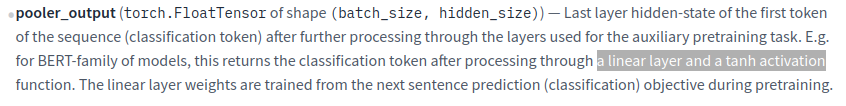

In [30]:
# The pooler
model.pooler

BertPooler(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (activation): Tanh()
)

In [31]:
# Number of parameters in pooler
len(list(model.pooler.parameters()))

2

In [32]:
# Inspect the pooler's
list(model.pooler.parameters())[0]

Parameter containing:
tensor([[ 0.0120,  0.0090, -0.0109,  ..., -0.0137, -0.0277, -0.0193],
        [ 0.0007, -0.0088,  0.0125,  ...,  0.0019,  0.0070,  0.0337],
        [ 0.0490,  0.0276, -0.0016,  ..., -0.0393,  0.0476,  0.0407],
        ...,
        [ 0.0436,  0.0322, -0.0091,  ..., -0.0533,  0.0455,  0.0382],
        [-0.0221, -0.0031, -0.0414,  ...,  0.0038, -0.0134,  0.0197],
        [ 0.0129,  0.0239, -0.0268,  ..., -0.0738,  0.0469, -0.0258]],
       requires_grad=True)

In [26]:
# OR
list(model.pooler.dense.parameters())[0]

Parameter containing:
tensor([[ 0.0120,  0.0090, -0.0109,  ..., -0.0137, -0.0277, -0.0193],
        [ 0.0007, -0.0088,  0.0125,  ...,  0.0019,  0.0070,  0.0337],
        [ 0.0490,  0.0276, -0.0016,  ..., -0.0393,  0.0476,  0.0407],
        ...,
        [ 0.0436,  0.0322, -0.0091,  ..., -0.0533,  0.0455,  0.0382],
        [-0.0221, -0.0031, -0.0414,  ...,  0.0038, -0.0134,  0.0197],
        [ 0.0129,  0.0239, -0.0268,  ..., -0.0738,  0.0469, -0.0258]],
       requires_grad=True)

Feel free to dive deeper in the model and share interesting things you find.